# 0 - Library import and prior configurations

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Visualisation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1 Introducción

## 1.1 Resumen del problema
La competición "Prediction of Wild Blueberry Yield" está orientado a predecir la producción de arándanos silvestres construyendo un modelo predictivo que pueda predecir con precisión el rendimiento de los arándanos silvestres basándose en una serie de características relacionadas con el entorno de crecimiento, la polinización, el clima y las características de las propias bayas. Para lograr esto, se nos proporciona un conjunto de datos que contiene una serie de variables que deben ser analizadas y utilizadas para entrenar nuestro modelo. 

*Nuestra meta es desarrollar un modelo que sea lo más preciso posible, y que pueda ser potencialmente utilizado por agricultores y científicos para tomar decisiones más informadas acerca de la producción de arándanos silvestres.*

## 1.2 Características del Conjunto de Datos
El conjunto de datos proporciona una serie de características relevantes para la predicción del rendimiento de los arándanos silvestres. A continuación, se presenta una descripción de estas características:

- *id*: Identificador único para cada observación o registro en el conjunto de datos.
  
- *clonesize*: Se refiere al tamaño de los clones de las plantas de arándano.
  
- *honeybee, bumbles, andrena, osmia*: Estos campos representan diferentes especies de abejas, y es probable que se refieran a la cantidad o presencia de estas especies en el área de crecimiento de los arándanos.
  
- *MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange*: Estos campos representan diferentes aspectos del rango de temperatura en el área de crecimiento de los arándanos.
  
- *RainingDays, AverageRainingDays*: Estos campos probablemente se refieren al número de días de lluvia y al promedio de días de lluvia en el área de crecimiento de los arándanos.
  
- *fruitset, fruitmass, seeds*: Estos campos representan diferentes aspectos de los frutos de los arándanos, incluyendo la cantidad de frutos producidos por planta, la masa de los frutos y el número de semillas por fruto.
  
- *yield*: Esta es la variable objetivo que estamos tratando de predecir. Representa la cantidad de arándanos producidos por unidad de tierra.

A través de un análisis cuidadoso y un uso eficaz de estas características, esperamos construir un modelo de aprendizaje automático que pueda predecir con precisión el rendimiento de los arándanos silvestres.

## 1.3 Acerca del mundo de los arándanos
La producción de arándanos silvestres es una industria significativa con implicaciones globales, y su éxito depende de una compleja red de factores ecológicos y agronómicos.

- *Polinización*: Un factor crítico en la producción de arándanos es la polinización, que es fundamentalmente llevada a cabo por varias especies de abejas, incluyendo las abejas melíferas, los abejorros, las Andrena y las Osmia. Estas especies son vitales para la transferencia de polen, lo que facilita la fertilización y, finalmente, la formación de frutos.
  
- *Condiciones Climáticas*: Las condiciones climáticas, en particular la temperatura y la precipitación, tienen un impacto significativo en el crecimiento de los arándanos. Las plantas de arándanos requieren un rango específico de temperaturas para prosperar, y los extremos en este rango pueden afectar adversamente el desarrollo de las flores y la formación de frutos. Además, el número de días de lluvia puede influir en la disponibilidad de agua para las plantas y la actividad de las abejas, afectando tanto la salud de las plantas como la eficacia de la polinización.
  
- *Características de las Plantas de Arándanos*: Las propiedades intrínsecas de las plantas de arándanos, como el tamaño del clon, el conjunto de frutos (fruitset), la masa del fruto (fruitmass), y el número de semillas, tienen un impacto directo en el rendimiento de la cosecha. Estas características pueden variar debido a factores genéticos y ambientales, y su interacción puede complicar la predicción del rendimiento.

La comprensión de estos factores y su interacción es fundamental para desarrollar un modelo predictivo preciso para el rendimiento de los arándanos silvestres. 

## 1.4 Metodología
Para afrontar el desafío de predecir el rendimiento de los arándanos silvestres, se propone:

- *Análisis exploratorio de datos (EDA)*: Análisis exhaustivo para comprender la naturaleza de los datos.
  
- *Preprocesamiento de datos*: Basándonos en los hallazgos del EDA, realizaremos el preprocesamiento de datos necesario. Esto puede incluir la imputación de valores faltantes, la transformación de características y la eliminación de outliers si se considera apropiado.
  
- *Ingeniería de características*: Exploraremos la creación de nuevas características a partir de las existentes para mejorar el rendimiento del modelo. Esto podría implicar la combinación de características relacionadas o la creación de características de interacción que capturen relaciones entre las características existentes.
  
- *Selección de modelos*: Probaremos varios modelos de aprendizaje automático con el objetivo de identificar el tipo de modelo más prometedor para este problema.
  
- *Optimización de hiperparámetros*: Una vez seleccionado el modelo se trabajará en la optimización de sus hiperparámetros para maximizar su rendimiento. 
  
- *Evaluación de modelos*: Finalmente, evaluaremos el rendimiento del modelo.


# 1 - Import the Data

In [8]:
# Read data    
dataTrain = pd.read_csv('input/train.csv')
dataTest = pd.read_csv('input/test.csv')

In [41]:
X_train = dataTrain.drop(['yield'], axis=1)
y_train = dataTrain['yield']

X_test = dataTest

In [46]:
# Print shape of data 
print(f"X_train: {dataTrain.shape}  X_test: {dataTest.shape}")


X_train: (15289, 18)  X_test: (10194, 17)


In [10]:
dataTrain.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [12]:
# Concatenate dataTrain and dataTest
X_train=dataTrain
# Print first 10 rows of X_train
#X_train.head(10)

# 2 - Transform the data

## 2.1 - Null values analysis

In [13]:
X_null_sum = X_train.isnull().sum() # Number of null values in each feature
X_nullP = round(X_train.isnull().sum()/X_train.shape[0]*100,1) # Percentage of null values in each feature rounded to 1 decimal
X_type = X_train.dtypes # Type of each feature
X_info = pd.concat([X_null_sum, X_nullP, X_type], axis=1) # Concatenate X_null, X_nullP and X_type in one dataframe
X_info.columns = ['Null', 'Null%', 'Type'] # Rename columns
X_info

,Null,Null%,Type
id,0,0.0,int64
clonesize,0,0.0,float64
honeybee,0,0.0,float64
bumbles,0,0.0,float64
andrena,0,0.0,float64
osmia,0,0.0,float64
MaxOfUpperTRange,0,0.0,float64
MinOfUpperTRange,0,0.0,float64
AverageOfUpperTRange,0,0.0,float64
MaxOfLowerTRange,0,0.0,float64


No null values found on the dataset

Splitting Cabin feature

## 3 - Feature engineering

In [20]:
# Show sum of unique values in each feature
X_train.nunique()

id                      15289
clonesize                   6
honeybee                    7
bumbles                    11
andrena                    16
osmia                      14
MaxOfUpperTRange            6
MinOfUpperTRange            5
AverageOfUpperTRange        5
MaxOfLowerTRange            6
MinOfLowerTRange            7
AverageOfLowerTRange        5
RainingDays                 6
AverageRainingDays          8
fruitset                 1526
fruitmass                1515
seeds                    2066
yield                     776
dtype: int64

In [21]:
# Get columns with sum of unique values below 10
X_features_UV_B10 = X_train.nunique()[X_train.nunique() < 10]
X_features_UV_B10.head(20)

clonesize               6
honeybee                7
MaxOfUpperTRange        6
MinOfUpperTRange        5
AverageOfUpperTRange    5
MaxOfLowerTRange        6
MinOfLowerTRange        7
AverageOfLowerTRange    5
RainingDays             6
AverageRainingDays      8
dtype: int64

## 3.1 - Clonessize Feature

In [39]:
# All unique values of clonesize feature
X_train['clonesize'].unique()

array([25. , 12.5, 37.5, 20. , 10. , 40. ])

Text(0.5, 1.0, 'Histogram of clonesize feature')

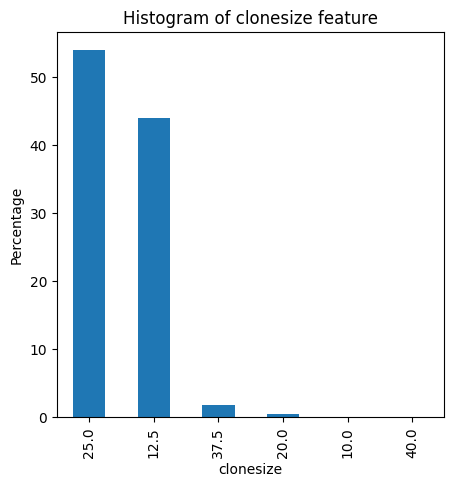

In [38]:
# Histogram for clonesize feature with values converted to percentage and showing it in %
(X_train['clonesize'].value_counts(normalize=True)*100).plot(kind='bar', stacked=True, figsize=(5, 5))
# X title
plt.xlabel('clonesize')
# Y title
plt.ylabel('Percentage')
# Plot title
plt.title('Histogram of clonesize feature')

# 4 - Modeling
## 4.1 - Preprocessing data prior to modeling

In [ ]:
# Shapoe of X_train, X_test, y_train and y_test
print(f"X_train: {X_train.shape}  X_test: {X_test.shape}  y_train: {y_test.shape}")

In [ ]:
# Output for submission
output = pd.DataFrame({'id': X_test['id'],
                       'yield': y_test})
output.to_csv('submission.csv', index=False) 